In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_excel("customer_spending.xlsx")
data.head()

,CustomerID,Gender,Age,Income in (1000),Region,Spending (Range 1-100),Unnamed: 6,Nairobi
0,592,Male,43,15,Kajiando,39,NaN,Kiambu
1,531,Male,18,15,Kiambu,81,NaN,Kajiando
2,472,Female,34,16,Kiambu,6,NaN,Machakos
3,247,Female,57,16,Nairobi,77,NaN,NaN
4,511,Female,44,17,Machakos,40,NaN,NaN


In [3]:
#drop unnamed 6 column
data.drop("Unnamed: 6", axis=1, inplace =True)

In [4]:
data.head()

,CustomerID,Gender,Age,Income in (1000),Region,Spending (Range 1-100),Nairobi
0,592,Male,43,15,Kajiando,39,Kiambu
1,531,Male,18,15,Kiambu,81,Kajiando
2,472,Female,34,16,Kiambu,6,Machakos
3,247,Female,57,16,Nairobi,77,NaN
4,511,Female,44,17,Machakos,40,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Income in (1000)        200 non-null    int64 
 4   Region                  200 non-null    object
 5   Spending (Range 1-100)  200 non-null    int64 
 6   Nairobi                 3 non-null      object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [6]:
d=data.isnull().sum()
d

CustomerID                  0
Gender                      0
Age                         0
Income in (1000)            0
Region                      0
Spending (Range 1-100)      0
Nairobi                   197
dtype: int64

In [7]:
#get null count percentage
null_percentage=round(100*(data.isnull().sum()/len(data.index)),2)
null_percentage

CustomerID                 0.0
Gender                     0.0
Age                        0.0
Income in (1000)           0.0
Region                     0.0
Spending (Range 1-100)     0.0
Nairobi                   98.5
dtype: float64

In [8]:
#drop column Nairobi- Null values are many
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Income in (1000)', 'Region',
       'Spending (Range 1-100)', 'Nairobi'],
      dtype='object')

In [9]:
data.drop('Nairobi', inplace=True, axis =1)

In [10]:
data

,CustomerID,Gender,Age,Income in (1000),Region,Spending (Range 1-100)
0,592,Male,43,15,Kajiando,39
1,531,Male,18,15,Kiambu,81
2,472,Female,34,16,Kiambu,6
3,247,Female,57,16,Nairobi,77
4,511,Female,44,17,Machakos,40
...,...,...,...,...,...,...
195,295,Female,23,120,Kajiando,79
196,243,Female,51,126,Kajiando,28
197,263,Male,63,126,Kajiando,74
198,327,Male,37,137,Kiambu,18


In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Income in (1000)          0
Region                    0
Spending (Range 1-100)    0
dtype: int64

In [12]:
region = data['Region'].value_counts()
region

Kajiando    60
Machakos    52
Kiambu      50
Nairobi     38
Name: Region, dtype: int64

In [13]:
gender =data['Gender'].value_counts()

In [14]:
gender

Female    112
Male       88
Name: Gender, dtype: int64

In [15]:
print('Keys: \n{}'.format(data.keys()))

Keys: 
Index(['CustomerID', 'Gender', 'Age', 'Income in (1000)', 'Region',
       'Spending (Range 1-100)'],
      dtype='object')


In [16]:
print('Target names: {}'.format(data['Gender'])) #use gender as target

Target names: 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


In [17]:
print('Feature names: {}'.format(data[['Age','Income in (1000)','Spending (Range 1-100)']].columns))

Feature names: Index(['Age', 'Income in (1000)', 'Spending (Range 1-100)'], dtype='object')


In [18]:
print('Target:\n {}'.format(data['Gender']))

Target:
 0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


In [19]:
features=data[['Age','Income in (1000)','Spending (Range 1-100)']]
target=data['Gender']

In [20]:
features

,Age,Income in (1000),Spending (Range 1-100)
0,43,15,39
1,18,15,81
2,34,16,6
3,57,16,77
4,44,17,40
...,...,...,...
195,23,120,79
196,51,126,28
197,63,126,74
198,37,137,18


In [21]:
target

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [22]:
#convert categorical data-gender into 0 and 1
genders=pd.get_dummies(data['Gender'])
genders

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [23]:
genders.dtypes

Female    uint8
Male      uint8
dtype: object

In [24]:
'''
Add above output to Dataframe -> Remove Gender Column -Remove Female column(if we want Male =1 and Female =0) -> 
Rename Male = Gender -> Show Output of Conversion.
'''
data['Male']=genders['Male']
data['Female']=genders['Female']

In [25]:
data.head()

,CustomerID,Gender,Age,Income in (1000),Region,Spending (Range 1-100),Male,Female
0,592,Male,43,15,Kajiando,39,1,0
1,531,Male,18,15,Kiambu,81,1,0
2,472,Female,34,16,Kiambu,6,0,1
3,247,Female,57,16,Nairobi,77,0,1
4,511,Female,44,17,Machakos,40,0,1


In [26]:
'''
Male=0
Female=1
 
so, we drop male and gender column, and rename female to be new gender
'''
data.drop(['Gender','Male'], axis=1, inplace=True)

In [27]:
data

,CustomerID,Age,Income in (1000),Region,Spending (Range 1-100),Female
0,592,43,15,Kajiando,39,0
1,531,18,15,Kiambu,81,0
2,472,34,16,Kiambu,6,1
3,247,57,16,Nairobi,77,1
4,511,44,17,Machakos,40,1
...,...,...,...,...,...,...
195,295,23,120,Kajiando,79,1
196,243,51,126,Kajiando,28,1
197,263,63,126,Kajiando,74,0
198,327,37,137,Kiambu,18,0


In [28]:
#rename Female to New_Gender
data.rename(columns = {'Female':'New_Gender'}, inplace= True)
data

,CustomerID,Age,Income in (1000),Region,Spending (Range 1-100),New_Gender
0,592,43,15,Kajiando,39,0
1,531,18,15,Kiambu,81,0
2,472,34,16,Kiambu,6,1
3,247,57,16,Nairobi,77,1
4,511,44,17,Machakos,40,1
...,...,...,...,...,...,...
195,295,23,120,Kajiando,79,1
196,243,51,126,Kajiando,28,1
197,263,63,126,Kajiando,74,0
198,327,37,137,Kiambu,18,0


In [30]:
''' convert Region from categorical to number format in this manner
Kajiando    1
Machakos    2
Kiambu      3
Nairobi     4
'''
#data['Regions'] = data['Region'].map({1: 'Kajiando', 2: 'Machakos', 3: 'Kiambu',4:'Nairobi'})
data['Regions'] = data['Region'].replace(['Kajiando','Machakos','Kiambu','Nairobi'],[1,2,3,4])
data

,CustomerID,Age,Income in (1000),Region,Spending (Range 1-100),New_Gender,Regions
0,592,43,15,Kajiando,39,0,1
1,531,18,15,Kiambu,81,0,3
2,472,34,16,Kiambu,6,1,3
3,247,57,16,Nairobi,77,1,4
4,511,44,17,Machakos,40,1,2
...,...,...,...,...,...,...,...
195,295,23,120,Kajiando,79,1,1
196,243,51,126,Kajiando,28,1,1
197,263,63,126,Kajiando,74,0,1
198,327,37,137,Kiambu,18,0,3


In [31]:
#drop region column now
data.drop('Region', axis=1, inplace=True)
data

,CustomerID,Age,Income in (1000),Spending (Range 1-100),New_Gender,Regions
0,592,43,15,39,0,1
1,531,18,15,81,0,3
2,472,34,16,6,1,3
3,247,57,16,77,1,4
4,511,44,17,40,1,2
...,...,...,...,...,...,...
195,295,23,120,79,1,1
196,243,51,126,28,1,1
197,263,63,126,74,0,1
198,327,37,137,18,0,3


In [32]:
data_1=data[['Age','Income in (1000)','Spending (Range 1-100)','New_Gender','Regions']]
data_1

,Age,Income in (1000),Spending (Range 1-100),New_Gender,Regions
0,43,15,39,0,1
1,18,15,81,0,3
2,34,16,6,1,3
3,57,16,77,1,4
4,44,17,40,1,2
...,...,...,...,...,...
195,23,120,79,1,1
196,51,126,28,1,1
197,63,126,74,0,1
198,37,137,18,0,3


In [33]:
x=data_1[['Age','Income in (1000)','Spending (Range 1-100)','Regions']]
y=data_1['New_Gender']

In [34]:
x

,Age,Income in (1000),Spending (Range 1-100),Regions
0,43,15,39,1
1,18,15,81,3
2,34,16,6,3
3,57,16,77,4
4,44,17,40,2
...,...,...,...,...
195,23,120,79,1
196,51,126,28,1
197,63,126,74,1
198,37,137,18,3


In [35]:
y

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: New_Gender, Length: 200, dtype: uint8

In [44]:
#split data into training and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=4, random_state=4)
x_train

,Age,Income in (1000),Spending (Range 1-100),Regions
1,18,15,81,3
111,46,63,54,3
90,19,59,55,2
177,37,88,69,3
88,44,58,60,4
...,...,...,...,...
104,19,62,56,1
129,68,71,75,3
183,58,98,88,3
174,42,88,13,1


In [45]:
x_test

,Age,Income in (1000),Spending (Range 1-100),Regions
11,20,19,99,3
99,18,61,49,4
128,60,71,11,2
175,42,88,86,2


In [46]:
y_train

1      0
111    1
90     1
177    0
88     1
      ..
104    0
129    0
183    1
174    1
122    1
Name: New_Gender, Length: 196, dtype: uint8

In [47]:
y_test

11     1
99     0
128    0
175    1
Name: New_Gender, dtype: uint8

In [49]:
model=LinearRegression().fit(x_train, y_train)

In [51]:
model.intercept_ #get y intercept

0.512233967185312

In [52]:
model.coef_

array([ 0.00260135, -0.00074376,  0.00069422, -0.02600848])

In [53]:
model.score(x_train, y_train)

0.013737472229769954

In [54]:
model.score(x_test,y_test)

0.07579794455993683

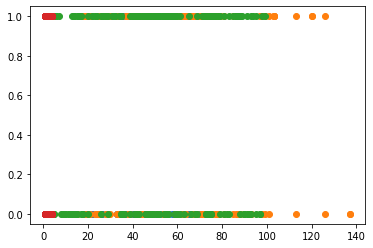

In [55]:
#create scatter
plt.plot(x, y, 'o')

In [59]:
#save the model
import pickle

In [60]:
# save the model to disk
filename = 'linear_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [62]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.07579794455993683
